# ✅ Retrain Model with Selected Features for Streamlit App
This notebook retrains GBR and RF models using only the features used in the Streamlit app.

In [ ]:
# 📁 STEP 1: Upload Dataset
from google.colab import files
uploaded = files.upload()  # Upload CarPrice.csv

Saving CarPrice.csv to CarPrice.csv


In [ ]:
# 📊 STEP 2: Load Dataset
import pandas as pd
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# 🧹 STEP 3: Preprocessing for Selected Features
from sklearn.preprocessing import LabelEncoder

# เลือกเฉพาะฟีเจอร์ที่ Streamlit ใช้
selected_features = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                     'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
                     'fuelsystem', 'wheelbase', 'curbweight', 'enginesize',
                     'horsepower', 'citympg', 'highwaympg']

# Drop คอลัมน์อื่นๆ
df = df[selected_features + ['price']]

# แปลง Label Encoding ให้ตรงกับ Streamlit
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

<ipython-input-3-79c7df1e80ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
<ipython-input-3-79c7df1e80ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
<ipython-input-3-79c7df1e80ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,wheelbase,curbweight,enginesize,horsepower,citympg,highwaympg,price
0,3,1,0,1,0,2,0,0,2,5,88.6,2548,130,111,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,88.6,2548,130,111,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,94.5,2823,152,154,19,26,16500.0
3,2,1,0,0,3,1,0,3,2,5,99.8,2337,109,102,24,30,13950.0
4,2,1,0,0,3,0,0,3,1,5,99.4,2824,136,115,18,22,17450.0


In [ ]:
# ✂ STEP 4: Train-Test Split
from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 🔁 STEP 5: Train GBR and RF Models
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# GBR Model
gbr = GradientBoostingRegressor(
    learning_rate=0.01,
    n_estimators=300,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("✅ GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("✅ GBR R2:", r2_score(y_test, y_pred_gbr))

# RF Model
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,                 # ลดความลึก
    min_samples_split=5,         # node จะแตกกิ่งก็ต่อเมื่อมี >= 5 samples
    min_samples_leaf=4,          # leaf ต้องมีอย่างน้อย 4 ตัวอย่าง
    max_features='sqrt',         # ใช้ sqrt(n_features) ในแต่ละ tree
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("✅ RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("✅ RF R2:", r2_score(y_test, y_pred_rf))

✅ GBR RMSE: 2338.4417375148805
✅ GBR R2: 0.9307318059199504
✅ RF RMSE: 2773.2067379201344
✅ RF R2: 0.9025806447967819


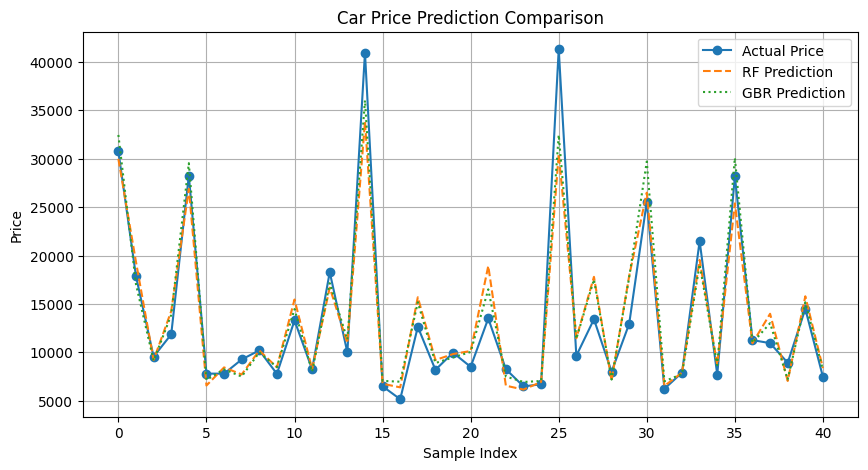

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(y_pred_rf, label='RF Prediction', linestyle='--')
plt.plot(y_pred_gbr, label='GBR Prediction', linestyle=':')
plt.legend()
plt.title('Car Price Prediction Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
# 💾 STEP 6: Save Models
import joblib

joblib.dump(gbr, 'gbr_model.pkl')
joblib.dump(rf, 'rf_model.pkl')

from google.colab import files
files.download('gbr_model.pkl')
files.download('rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>